# Stock Price Prediction using RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png)

### What is Stock Price Prediction?

Stock price prediction is the act of trying to determine the future of a company stock. This can be done by analyzing the past data.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

### Loading in Dataset

In [6]:
df = pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Preprocessing and Feature Extraction

In [7]:
df = df['open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599]])

In [8]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263]])

In [10]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213]])

In [16]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
        print("x_index:", i-50, "y_index:", i)
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [17]:
x_train, y_train = create_dataset(dataset_train)
# x_train[:1]
# print(x_train)

x_index: 0 y_index: 50
x_index: 1 y_index: 51
x_index: 2 y_index: 52
x_index: 3 y_index: 53
x_index: 4 y_index: 54
x_index: 5 y_index: 55
x_index: 6 y_index: 56
x_index: 7 y_index: 57
x_index: 8 y_index: 58
x_index: 9 y_index: 59
x_index: 10 y_index: 60
x_index: 11 y_index: 61
x_index: 12 y_index: 62
x_index: 13 y_index: 63
x_index: 14 y_index: 64
x_index: 15 y_index: 65
x_index: 16 y_index: 66
x_index: 17 y_index: 67
x_index: 18 y_index: 68
x_index: 19 y_index: 69
x_index: 20 y_index: 70
x_index: 21 y_index: 71
x_index: 22 y_index: 72
x_index: 23 y_index: 73
x_index: 24 y_index: 74
x_index: 25 y_index: 75
x_index: 26 y_index: 76
x_index: 27 y_index: 77
x_index: 28 y_index: 78
x_index: 29 y_index: 79
x_index: 30 y_index: 80
x_index: 31 y_index: 81
x_index: 32 y_index: 82
x_index: 33 y_index: 83
x_index: 34 y_index: 84
x_index: 35 y_index: 85
x_index: 36 y_index: 86
x_index: 37 y_index: 87
x_index: 38 y_index: 88
x_index: 39 y_index: 89
x_index: 40 y_index: 90
x_index: 41 y_index: 91
x_

x_index: 457 y_index: 507
x_index: 458 y_index: 508
x_index: 459 y_index: 509
x_index: 460 y_index: 510
x_index: 461 y_index: 511
x_index: 462 y_index: 512
x_index: 463 y_index: 513
x_index: 464 y_index: 514
x_index: 465 y_index: 515
x_index: 466 y_index: 516
x_index: 467 y_index: 517
x_index: 468 y_index: 518
x_index: 469 y_index: 519
x_index: 470 y_index: 520
x_index: 471 y_index: 521
x_index: 472 y_index: 522
x_index: 473 y_index: 523
x_index: 474 y_index: 524
x_index: 475 y_index: 525
x_index: 476 y_index: 526
x_index: 477 y_index: 527
x_index: 478 y_index: 528
x_index: 479 y_index: 529
x_index: 480 y_index: 530
x_index: 481 y_index: 531
x_index: 482 y_index: 532
x_index: 483 y_index: 533
x_index: 484 y_index: 534
x_index: 485 y_index: 535
x_index: 486 y_index: 536
x_index: 487 y_index: 537
x_index: 488 y_index: 538
x_index: 489 y_index: 539
x_index: 490 y_index: 540
x_index: 491 y_index: 541
x_index: 492 y_index: 542
x_index: 493 y_index: 543
x_index: 494 y_index: 544
x_index: 495

x_index: 859 y_index: 909
x_index: 860 y_index: 910
x_index: 861 y_index: 911
x_index: 862 y_index: 912
x_index: 863 y_index: 913
x_index: 864 y_index: 914
x_index: 865 y_index: 915
x_index: 866 y_index: 916
x_index: 867 y_index: 917
x_index: 868 y_index: 918
x_index: 869 y_index: 919
x_index: 870 y_index: 920
x_index: 871 y_index: 921
x_index: 872 y_index: 922
x_index: 873 y_index: 923
x_index: 874 y_index: 924
x_index: 875 y_index: 925
x_index: 876 y_index: 926
x_index: 877 y_index: 927
x_index: 878 y_index: 928
x_index: 879 y_index: 929
x_index: 880 y_index: 930
x_index: 881 y_index: 931
x_index: 882 y_index: 932
x_index: 883 y_index: 933
x_index: 884 y_index: 934
x_index: 885 y_index: 935
x_index: 886 y_index: 936
x_index: 887 y_index: 937
x_index: 888 y_index: 938
x_index: 889 y_index: 939
x_index: 890 y_index: 940
x_index: 891 y_index: 941
x_index: 892 y_index: 942
x_index: 893 y_index: 943
x_index: 894 y_index: 944
x_index: 895 y_index: 945
x_index: 896 y_index: 946
x_index: 897

In [9]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [10]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Building Model

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

In [14]:
model = load_model('stock_prediction.h5')

### Visualizing Results

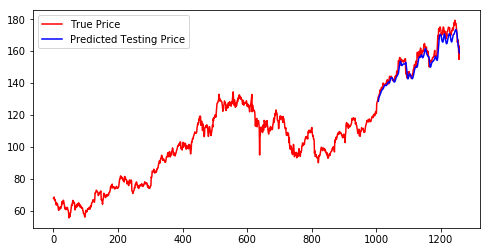

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

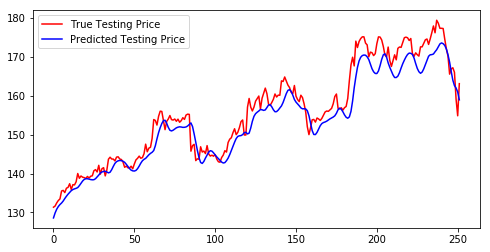

In [16]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [17]:
x = x_test[-1]
num_timesteps = 100
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[158.93146, 264.7039, 322.72485, 338.33698, 344.51175, 346.56482, 347.41708, 347.84174, 348.11456, 348.32028, 348.48422, 348.61807, 348.7292, 348.822, 348.90002, 348.9662, 349.02246, 349.0703, 349.11133, 349.14648, 349.17664, 349.20248, 349.22473, 349.2437, 349.26013, 349.2741, 349.28613, 349.29666, 349.30576, 349.31372, 349.32074, 349.32672, 349.332, 349.33603, 349.339, 349.3408, 349.34155, 349.34195, 349.3431, 349.34628, 349.3531, 349.36417, 349.3784, 349.39267, 349.4014, 349.3969, 349.37064, 349.31384, 349.22308, 349.10657, 348.96777, 348.96805, 348.9681, 348.9682, 348.96823, 348.96826, 348.96826, 348.96835, 348.96832, 348.96832, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96832, 348.96832, 348.96832, 348.96835, 348.96835, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.96838, 348.968

## Resources

<ul>
    <li><a href="https://en.wikipedia.org/wiki/Stock_market_prediction">Stock market prediction (Wikipedia)</a></li>
    <li><a href="https://towardsdatascience.com/stock-prediction-in-python-b66555171a2">Stock Prediction in Python (William Koehrsen on Medium)</a></li>
    <li><a href="https://github.com/topics/stock-price-prediction?l=python">Stock Price Prediction (Github Respositorys)</a></li>
    <li><a href="https://programmingwithgilbert.firebaseapp.com/videos/machine-learning-explained/recurrent-neural-networks-lstm-explained">Recurrent Neural Networks / LSTM Explained (my own video)</a></li>
</ul>